<a href="https://colab.research.google.com/github/Alisher452/Alisher452/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80%D0%B0_%D0%BD%D0%B0_%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4_%D1%81_10_07_%D0%BF%D0%BE_10_08_2023_%D0%B3%D0%BE%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Рассмотрим тестовый прогноз курса доллара по отношению к рублю,где будем использовать модель ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa. arima.model import ARIMA
import math

#Создаем Data Frame  с данными о курсе $
data = {'Дата':['2023-01-01','2023-02-01','2023-03-01','2023-04-01','2023-05-01','2023-06-01','2023-07-01','2023-07-08'],'Курс':[69.23,73.03,76.09,80.89,78.95,83.16,89.06,95.69]}
df = pd.DataFrame(data)
#Преобразуем столбец с датой в тип datetime
df ['Дата'] = pd.to_datetime(df['Дата'])
#Устанавливаем столбец  с датой как индекс DataFrame
df.set_index('Дата',inplace = True)
#Проверка данных
print(df)

             Курс
Дата             
2023-01-01  69.23
2023-02-01  73.03
2023-03-01  76.09
2023-04-01  80.89
2023-05-01  78.95
2023-06-01  83.16
2023-07-01  89.06
2023-07-08  95.69


In [2]:
# Посмотрим статистику
df.describe()

,Курс
count,8.000000
mean,80.762500
std,8.580298
min,69.230000
25%,75.325000
50%,79.920000
75%,84.635000
max,95.690000


<Axes: xlabel='Дата'>

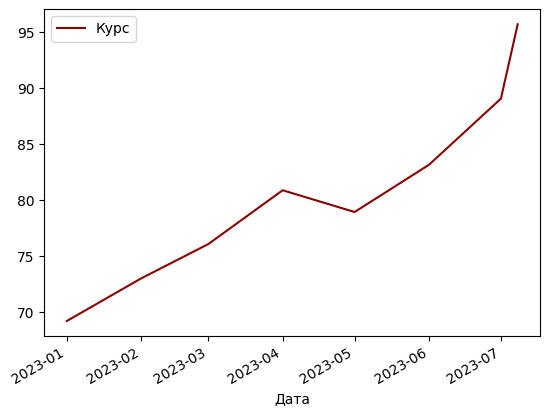

In [3]:
# Посмотрим на график временного ряда
df.plot(color = 'darkred')

array([[<Axes: title={'center': 'Курс'}>]], dtype=object)

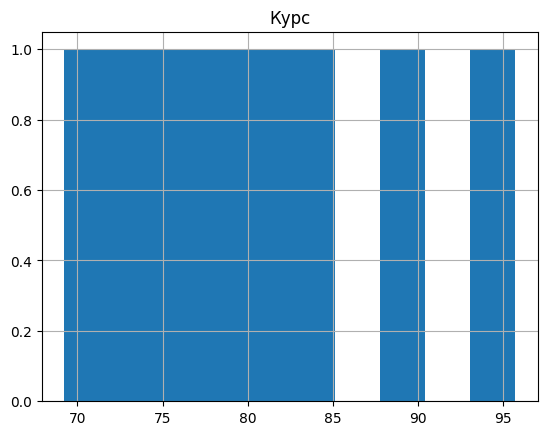

In [4]:
# Посмотрим на гистограмму,чтобы понять распределение данных,
# что в свою очередь помогает в прогнозировании переменной
df.hist()

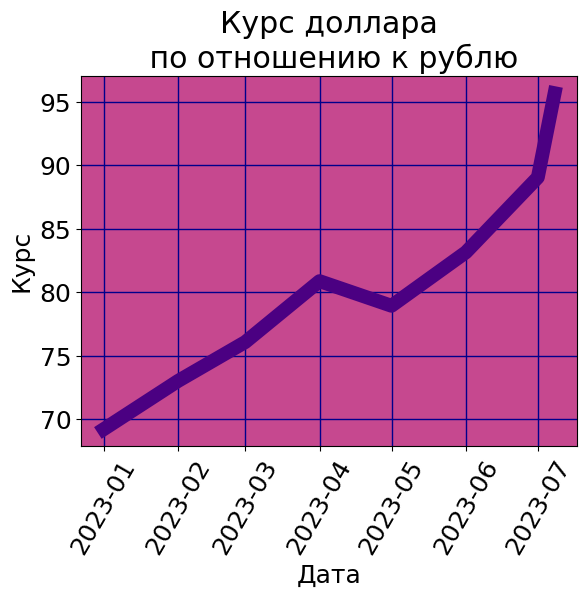

In [5]:
#Визуалируем курс доллара на графике'
plt.rcParams['font.size'] = '18'
ax = plt.axes()
ax.set_facecolor("#C6488F")
plt.plot(df.index,df['Курс'],color = 'indigo',markersize = 12,linewidth=10)
plt.grid(True, color='darkblue', linewidth=1)
plt.title('Курс доллара\n по отношению к рублю')
plt.xlabel('Дата')
plt.ylabel('Курс')
plt.xticks(rotation =60)
plt.show()

In [6]:
#Разделяем данные на обучающую и тестовую выборки
train_size = int(len(df*0.9))# 90% данных для обучения
train,test = df[:train_size],df[train_size:]

In [7]:
# Обучение модели ARIMA
model = ARIMA(train['Курс'].values,order=(2,1,2))

In [8]:
# Параметры модели и Функция, которая вызывает модель ARIMA для подгонки и прогнозирования данных
def StartARIMAForecasting(Actual, P, D, Q):
  model = ARIMA(Actual, order=(P, D, Q))
  model_fit = model.fit()
  prediction = model_fit.forecast()[0]
  return prediction


In [9]:
#Создание данных
ExchangeRates = df['Курс'].values

In [10]:
#Прогнозирование следующего значения
predicted = StartARIMAForecasting(ExchangeRates,1,1,1)

In [11]:
#Отображение значения
predicted

99.17468071655794

Мы передали значения курса доллара по отношению к рублю за последние 6 месяцев в качестве набора данных. Модель ARIMA предсказала следующее значение как 99.175.Это тестовые показатели  среднего курса доллара по отношению к рублю на период с 10 июля по 10 августа 2023 года.Посмотрим каков будет средний курс доллара по отношению к рублю за этот период на самом деле..